In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

In [5]:
# Reading the datset
df=pd.read_csv('gold_monthly_csv.csv',index_col='Date',parse_dates=True)
df.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


<Axes: xlabel='Date'>

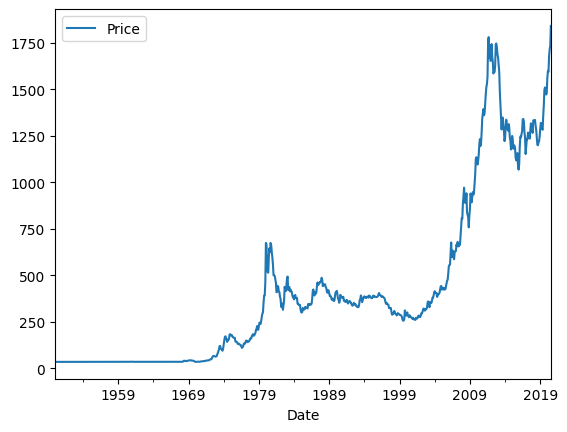

In [8]:
df.plot()

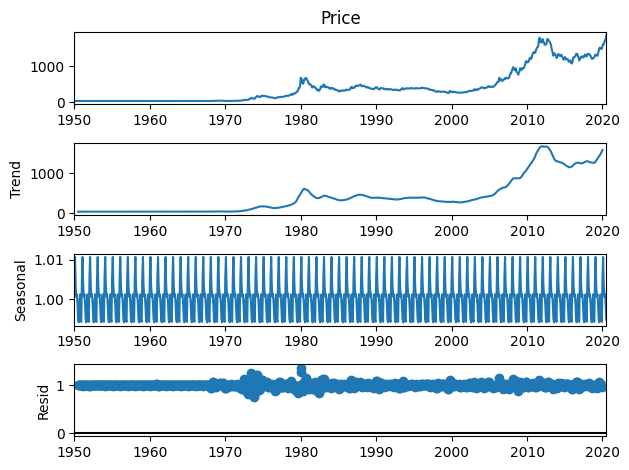

In [7]:
## Decomposition of time series
result=seasonal_decompose(df['Price'],model='multiplicative')
result.plot()
plt.tight_layout()

In [9]:
import statsmodels.api as sm


# Analyzing acf & pacf when series is not stationary

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


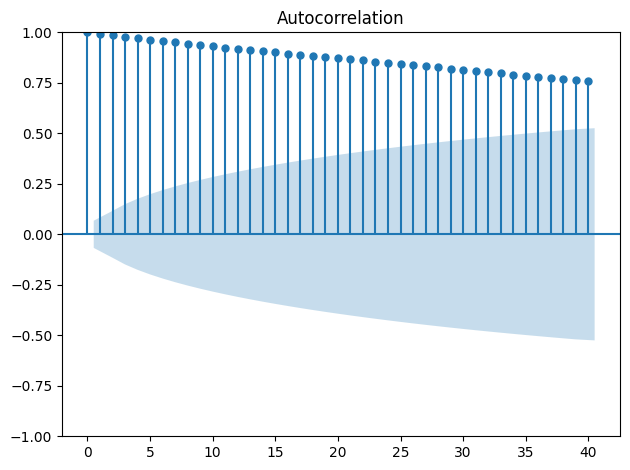

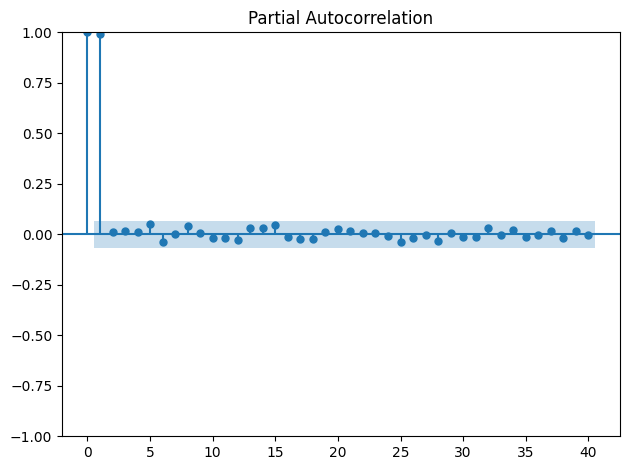

In [11]:
sm.graphics.tsa.plot_acf(df['Price'], lags=40)
plt.tight_layout()

sm.graphics.tsa.plot_pacf(df['Price'], lags=40)
plt.tight_layout()

Check whether series is stationary or not

In [17]:
# Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Price'])
print("p-value is :- {}" .format(result[1]))

p-value is :- 0.9918639010465631


Concept of differencing

In [19]:
df['Price'].head(5)

Date
1950-01-01    34.73
1950-02-01    34.73
1950-03-01    34.73
1950-04-01    34.73
1950-05-01    34.73
Name: Price, dtype: float64

In [20]:
df['Price']-df['Price'].shift(1)


Date
1950-01-01        NaN
1950-02-01      0.000
1950-03-01      0.000
1950-04-01      0.000
1950-05-01      0.000
               ...   
2020-03-01     -5.054
2020-04-01     86.266
2020-05-01     35.667
2020-06-01     18.335
2020-07-01    106.775
Name: Price, Length: 847, dtype: float64

Checking stationaity again after differencing

In [31]:
from statsmodels.tsa.stattools import adfuller
n=1
result = adfuller(df['Price'].diff(periods=n)[n:])
print("p-value is :- {}" .format(result[1]))

p-value is :- 5.33328251334224e-08


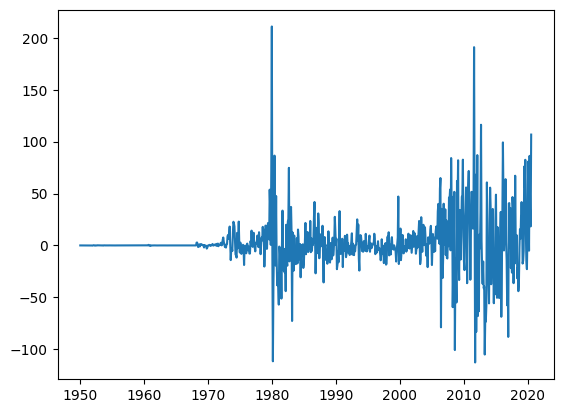

In [32]:
plt.plot(df['Price']-df['Price'].shift(1)[1:])

In [33]:
n=1
data_1=df['Price'].diff(periods=n)[n:]


Deciding order of p& q after making series stationary and analyzing the acf & pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


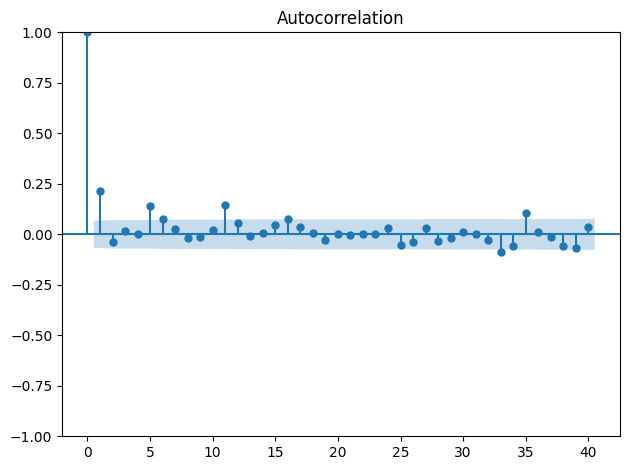

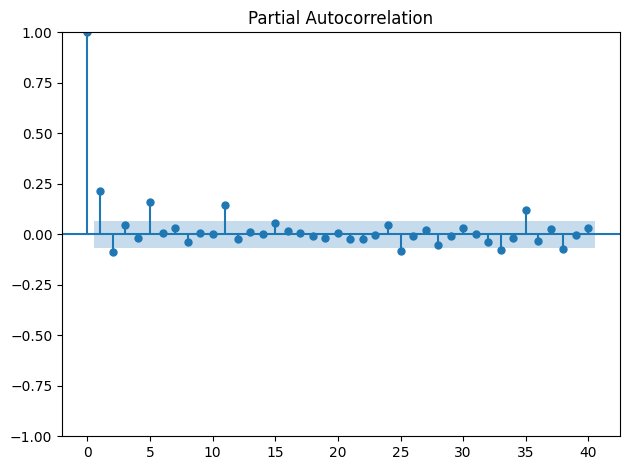

In [34]:
sm.graphics.tsa.plot_acf(data_1, lags=40)
plt.tight_layout()

sm.graphics.tsa.plot_pacf(data_1, lags=40)
plt.tight_layout()

In [37]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Price'],order=(4,1,3))
results=model.fit()
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  847
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -3882.453
Date:                Fri, 28 Apr 2023   AIC                           7780.907
Time:                        09:09:04   BIC                           7818.831
Sample:                    01-01-1950   HQIC                          7795.437
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3820      0.048      8.026      0.000       0.289       0.475
ar.L2         -0.2428      0.058     -4.163      0.000      -0.357      -0.128
ar.L3         -0.7196      0.051    -14.119      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Automatic Arima (Model by self decides the parameters)

In [38]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.6 MB/s eta 0:00:00


In [39]:
from pmdarima.arima import auto_arima
# Find the optimal parameters
model = auto_arima(df['Price'],suppress_warnings=True)
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  847
Model:               SARIMAX(1, 2, 2)   Log Likelihood               -3889.393
Date:                Fri, 28 Apr 2023   AIC                           7786.785
Time:                        09:10:00   BIC                           7805.743
Sample:                    01-01-1950   HQIC                          7794.049
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6018      0.041    -14.786      0.000      -0.682      -0.522
ma.L1         -0.1598      0.031     -5.173      0.000      -0.220      -0.099
ma.L2         -0.7731      0.028    -27.501      0.0

Concept of Moving Averages

                  Price
Date                   
1950-01-01          NaN
1950-02-01          NaN
1950-03-01          NaN
1950-04-01          NaN
1950-05-01          NaN
...                 ...
2020-03-01  1462.550667
2020-04-01  1495.249000
2020-05-01  1531.352083
2020-06-01  1562.647417
2020-07-01  1598.163750

[847 rows x 1 columns]                  Price
Date                  
1950-01-01         NaN
1950-02-01         NaN
1950-03-01         NaN
1950-04-01         NaN
1950-05-01         NaN
...                ...
2020-03-01  107.225773
2020-04-01  108.856818
2020-05-01  103.583451
2020-06-01  103.339347
2020-07-01  119.768823

[847 rows x 1 columns]


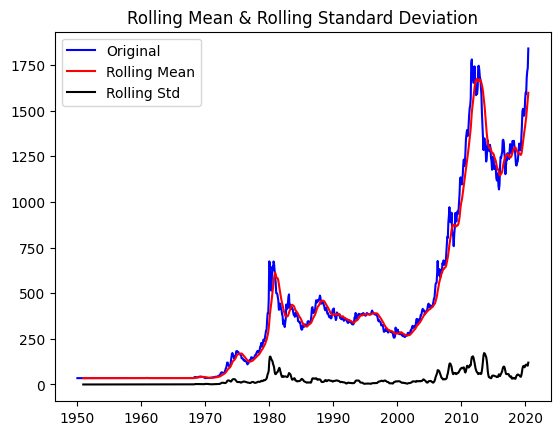

In [40]:
#Determing rolling statistics
rolmean = df.rolling(window = 12).mean()
rolstd = df.rolling(window = 12).std()
print(rolmean,rolstd)
#plot rolling statistics
orig=plt.plot(df, color = 'blue', label = 'Original')
mean=plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std=plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [41]:
timeseries = df[["Price"]].values.astype('float32')

In [42]:
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]


In [43]:
test

array([[ 344.707],
       [ 344.1  ],
       [ 340.805],
       [ 323.78 ],
       [ 323.998],
       [ 322.616],
       [ 324.863],
       [ 306.345],
       [ 288.776],
       [ 289.264],
       [ 297.743],
       [ 295.87 ],
       [ 308.558],
       [ 298.971],
       [ 292.223],
       [ 292.874],
       [ 284.228],
       [ 288.661],
       [ 296.595],
       [ 294.243],
       [ 291.357],
       [ 287.333],
       [ 287.495],
       [ 286.243],
       [ 282.62 ],
       [ 276.932],
       [ 261.402],
       [ 256.198],
       [ 256.936],
       [ 264.47 ],
       [ 311.562],
       [ 293.65 ],
       [ 283.743],
       [ 284.59 ],
       [ 300.855],
       [ 286.704],
       [ 279.961],
       [ 275.293],
       [ 285.368],
       [ 282.152],
       [ 274.523],
       [ 273.676],
       [ 270.405],
       [ 265.989],
       [ 271.892],
       [ 265.934],
       [ 262.018],
       [ 263.273],
       [ 260.75 ],
       [ 272.057],
       [ 270.738],
       [ 267.707],
       [ 272

In [45]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        print(X)
        y.append(target)
        print(y)
    return torch.tensor(X), torch.tensor(y)
 
lookback = 4
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)

Streaming output truncated to the last 5000 lines.
       [34.49],
       [34.49],
       [34.68]], dtype=float32), array([[34.49],
       [34.49],
       [34.68],
       [34.82]], dtype=float32), array([[34.49],
       [34.68],
       [34.82],
       [34.73]], dtype=float32), array([[34.68],
       [34.82],
       [34.73],
       [34.53]], dtype=float32), array([[34.82],
       [34.73],
       [34.53],
       [34.57]], dtype=float32), array([[34.73],
       [34.53],
       [34.57],
       [34.58]], dtype=float32), array([[34.53],
       [34.57],
       [34.58],
       [34.51]], dtype=float32), array([[34.57],
       [34.58],
       [34.51],
       [34.63]], dtype=float32), array([[34.58],
       [34.51],
       [34.63],
       [34.72]], dtype=float32), array([[34.51],
       [34.63],
       [34.72],
       [34.79]], dtype=float32), array([[34.63],
       [34.72],
       [34.79],
       [34.88]], dtype=float32), array([[34.72],
       [34.79],
       [34.88],
       [34.95]], dtype=flo

<ipython-input-45-b4c305f2de02>:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.tensor(X), torch.tensor(y)


Streaming output truncated to the last 5000 lines.
       [1291.63 ],
       [1319.755]], dtype=float32), array([[1249.887],
       [1291.63 ],
       [1319.755],
       [1302.286]], dtype=float32), array([[1291.63 ],
       [1319.755],
       [1302.286],
       [1287.65 ]], dtype=float32), array([[1319.755],
       [1302.286],
       [1287.65 ],
       [1282.46 ]], dtype=float32), array([[1302.286],
       [1287.65 ],
       [1282.46 ],
       [1358.488]], dtype=float32), array([[1287.65 ],
       [1282.46 ],
       [1358.488],
       [1414.611]], dtype=float32), array([[1282.46 ],
       [1358.488],
       [1414.611],
       [1497.102]], dtype=float32), array([[1358.488],
       [1414.611],
       [1497.102],
       [1510.336]], dtype=float32), array([[1414.611],
       [1497.102],
       [1510.336],
       [1494.765]], dtype=float32), array([[1497.102],
       [1510.336],
       [1494.765],
       [1471.921]], dtype=float32), array([[1510.336],
       [1494.765],
       [1471.921],


In [46]:
X_train

tensor([[[ 34.7300],
         [ 34.7300],
         [ 34.7300],
         [ 34.7300]],

        [[ 34.7300],
         [ 34.7300],
         [ 34.7300],
         [ 34.7300]],

        [[ 34.7300],
         [ 34.7300],
         [ 34.7300],
         [ 34.7300]],

        ...,

        [[383.2900],
         [380.9090],
         [377.8690],
         [369.3380]],

        [[380.9090],
         [377.8690],
         [369.3380],
         [355.0250]],

        [[377.8690],
         [369.3380],
         [355.0250],
         [346.4000]]])

In [50]:
class gold(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x
 
model = gold()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

In [51]:
n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 254.0666, test RMSE 1003.0829
Epoch 100: train RMSE 88.3600, test RMSE 776.8701
Epoch 200: train RMSE 31.4078, test RMSE 646.7322
Epoch 300: train RMSE 23.1997, test RMSE 587.2918
Epoch 400: train RMSE 18.8090, test RMSE 560.5261
Epoch 500: train RMSE 16.2786, test RMSE 533.0656
Epoch 600: train RMSE 16.9624, test RMSE 541.2823
Epoch 700: train RMSE 18.2819, test RMSE 549.5848
Epoch 800: train RMSE 18.4295, test RMSE 532.7458
Epoch 900: train RMSE 15.2706, test RMSE 511.0143
Epoch 1000: train RMSE 15.9632, test RMSE 511.8165
Epoch 1100: train RMSE 14.7618, test RMSE 494.6883
Epoch 1200: train RMSE 15.5362, test RMSE 483.8882
Epoch 1300: train RMSE 15.8004, test RMSE 487.6682
Epoch 1400: train RMSE 14.5671, test RMSE 484.6274
Epoch 1500: train RMSE 15.0636, test RMSE 485.3816
Epoch 1600: train RMSE 15.7495, test RMSE 493.0474
Epoch 1700: train RMSE 17.5488, test RMSE 479.3979
Epoch 1800: train RMSE 15.1222, test RMSE 496.6671
Epoch 1900: train RMSE 17.3245, test RMSE

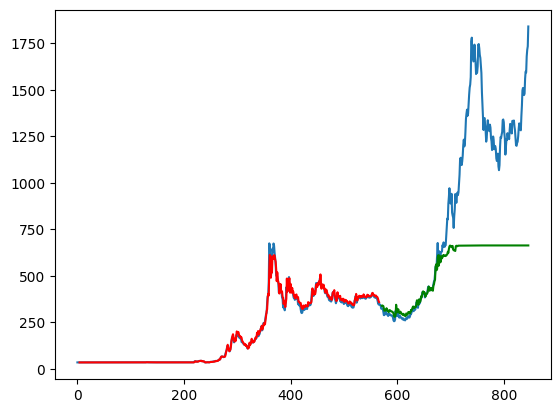

In [53]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot [lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()